In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive
[Errno 2] No such file or directory: '/gdrive/MyDrive/Code/filter_data'
/content


In [3]:
%cd /gdrive/MyDrive/github/filter_data

/gdrive/MyDrive/github/filter_data


In [ ]:
# !pip install ipympl

In [4]:
# imports
import pandas as pd
import numpy as np
import random
import os
import pickle

random.seed(47)

lang = 'en'
read_dir = os.path.join(os.getcwd(),'embedding_data', lang)
files = os.listdir(read_dir)
data_files = [file for file in files if file.endswith(".pickle")]

for file in data_files:
  with open(f'{os.path.join(read_dir, file)}', 'rb') as handle:
    data = pickle.load(handle)

In [5]:
intents = sorted(data["intent"].unique())
intent_counts = data["intent"].value_counts(sort = True, ascending = False)
print("Categories of samples:\n", intent_counts)

Categories of samples:
 inform                      1045
fastag_recharge              454
emi_collection_full          345
mobile_recharge_prepaid      304
gas_payment                  298
insurance_renewal            286
balance_check                274
mobile_recharge_postpaid     256
electricity_payment          250
p2p_transfer                 217
emi_collection_partial       210
petrol_payment               143
upi_creation                  55
confirm                       22
cancel                        18
Name: intent, dtype: int64


In [6]:
embedding_features = [tensor.tolist() for tensor in data.embedding]
embedding_features_df = pd.DataFrame(embedding_features)
target = data.intent

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_dims = pca.fit_transform(embedding_features_df)
pca_df = pd.DataFrame(pca_dims, columns=['pca1', 'pca2'])

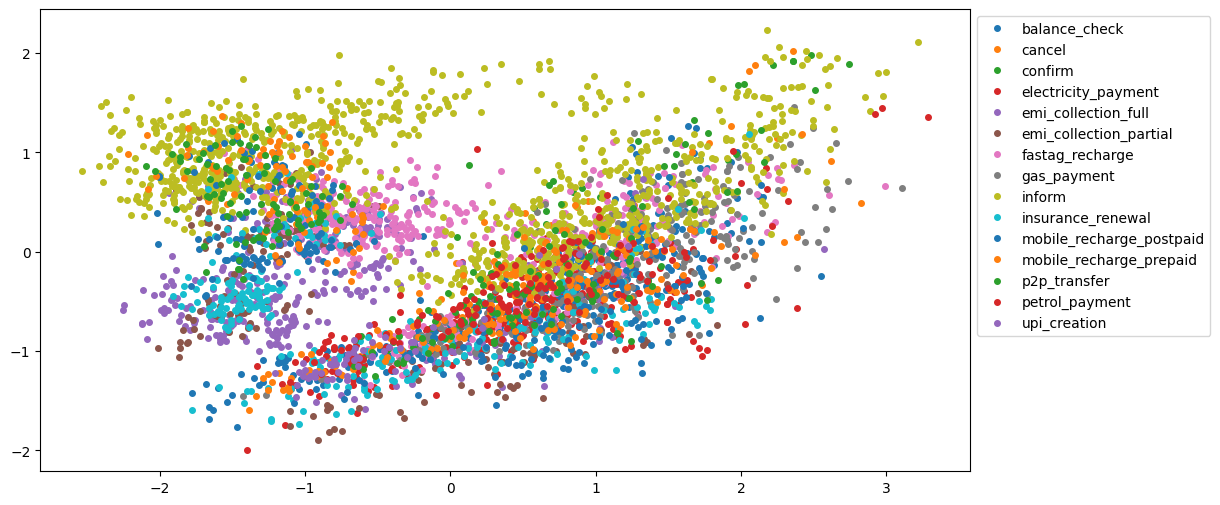

In [8]:
import matplotlib.pyplot as plt

plt_data = pd.concat([target, pca_df], axis=1)
groups = plt_data.groupby('intent')
# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.pca1, group.pca2, marker='o', linestyle='', ms=4, label=name)
# ax.legend()
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
pca = PCA(n_components=3)

pca_3dims = pca.fit_transform(embedding_features_df)
pca_3df = pd.DataFrame(pca_3dims, columns=['pca1', 'pca2', 'pca3'])

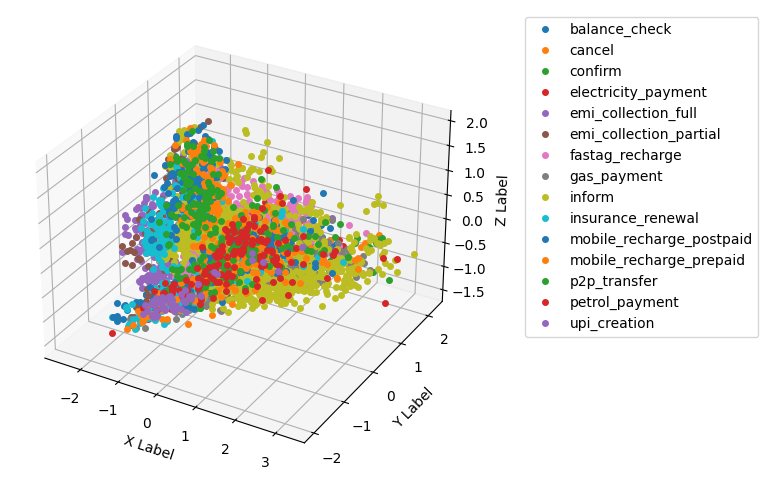

In [ ]:
# %matplotlib inline
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(projection='3d')

plt_3data = pd.concat([target, pca_3df], axis=1)
groups = plt_3data.groupby('intent')
# Plot
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.pca1, group.pca2, group.pca3, marker='o', linestyle='', ms=4, label=name)
# ax.legend()
ax.legend(bbox_to_anchor=(1.1, 1))
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()